In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import torch
from src.utils.datasets.ggimages import OpenImage
from src.utils.datasets.transform import RandomHorizontalFlip, Resize, Compose, XyToCenter
import torchvision.transforms as transforms
from src.utils.display.images import imshow, result_show
from torch.utils.data import DataLoader
from src.utils.datasets.adapter import convert_data

from src.network.yolo import Yolo

general_transform = Compose([
    Resize((608, 608)),
    XyToCenter()
#     RandomHorizontalFlip(0.5)
])


transform = transforms.Compose([
#                 transforms.RandomChoice([
#                     transforms.ColorJitter(hue=.1, saturation=.1),
#                     transforms.RandomGrayscale(p=0.7),
#                 ]),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [
                                     0.229, 0.224, 0.225])
            ])

In [4]:
batch_size = 1

ds = OpenImage('/data/data', 'OpenImage', general_transform=general_transform, transform=transform)

train_data_loader = DataLoader(ds, batch_size=batch_size, shuffle=True, collate_fn=convert_data, num_workers=0)

In [5]:
ds.classes

['__background__', 'Plant', 'Flower']

torch.Size([1, 3, 608, 608])
torch.Size([1, 2, 1, 19, 19])


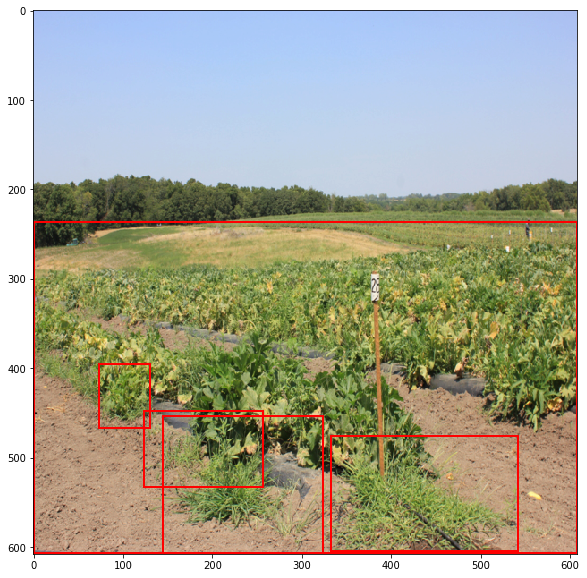

torch.Size([1, 3, 608, 608])
torch.Size([1, 2, 1, 19, 19])


In [53]:
for i, data in enumerate(train_data_loader):
    if not data:
        continue
    if i > 0:
        break
    batch_tensor, batch_boxes, detectors_mask, matching_true_boxes, im_info, img_names = data
    #     print batch_boxes.shape
    for k in range(batch_tensor.shape[0]):
        current_im_info = im_info[k]
        tmp = batch_boxes[k] * torch.Tensor([current_im_info[0], current_im_info[1], current_im_info[0], current_im_info[1], 1])
        tmp = tmp.numpy()        
        between = tmp[:, 2:4] / 2        
        xy = tmp[:, :2]
        xy_min = xy - between
        xy_max = xy + between
        imshow(batch_tensor[k], gt_boxes=np.hstack((xy_min, xy_max)))